# MNIST

Neste exercício, usaremos o conjunto de dados MNIST, que é um conjunto de 70.000 pequenas imagens de dígitos manuscritos por estudantes do ensino médio e funcionários do US Census Bureau. Cada imagem é rotulada com o dígito que representa. Esse conjunto foi estudado tanto que costuma ser chamado de “Olá Mundo” do Machine Learning: sempre que as pessoas criam um novo algoritmo de classificação, ficam curiosas para ver como ele será executado no MNIST. Sempre que alguém aprende o Machine Learning, mais cedo ou mais tarde ele enfrenta o MNIST.

https://en.wikipedia.org/wiki/MNIST_database

![https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)
              Referência: https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png

# Parte 1

Observe o último exercício para verificar como ler e manipular o MNIST dataset.

### Exercicio 1.1

Os classificadores SVM são binários e só conseguem prever entre duas classes 0 e 1. Por favor, manipule o conjunto de treinamento e teste para que haja apenas elementos cujo digito seja `0`e `1`

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

#### Os labels devem ser da forma (Não necessariamente nessa ordem)
```mnist.target[:10]
array(['0', '1', '1', '1', '0', ...```

#### Ou seja, remova de  `mnist.data` e `mnist.target` todos os elementos que não sejam `0` e `1`

Nota: Cuidado para não ter labels e imagens com referencias incorretas. Toda imagem de um caractere `0` deve corresponder ao `mnist.target` com valor `0`. Por exemplo, se você remover o primeiro item do `mnist.target` deve remover também de `mnist.data` e assim por diante.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_mnist = pd.DataFrame(data = mnist.data, columns = mnist.feature_names)
df_mnist["target"] = mnist.target.astype(float)

In [4]:
df_mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [5]:
df_mnist1 = df_mnist[df_mnist["target"] < 2]

df_mnist1

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exercicio 1.2

Crie um classificador SVM para o MNIST dataset. Utilize o `sklearn` para tal atividade.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X = df_mnist1.drop(["target"], axis = 1)
y = df_mnist1["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2)

svm_clf = LinearSVC(C = 1, loss = "hinge")

svm_clf.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

The accuracy of the classifier is 0.9969553450608931


Text(0.5, 0.98, 'Confusion matrix')

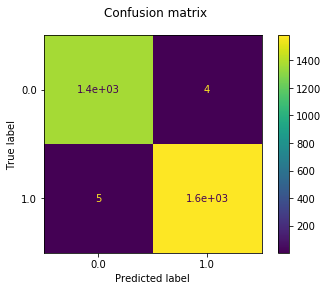

In [7]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

predict = svm_clf.predict(X_test)

print("The accuracy of the classifier is {}".format(accuracy_score(y_test, predict)))

disp = plot_confusion_matrix(svm_clf, X_test, y_test)
disp.figure_.suptitle("Confusion matrix")

### Exercício 1.3

Treine um classificador SVM no conjunto de dados MNIST. Nesse caso com o dataset inteiro. Como os classificadores SVM são binários, você precisará usar uma abordagem "um contra todos" para classificar todos os 10 dígitos.

Referência: https://scikit-learn.org/stable/modules/svm.html

In [8]:
X = df_mnist.drop("target", axis = 1)
y = df_mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2)

In [9]:
from sklearn.svm import SVC

svc_clf = SVC(decision_function_shape = 'ovo')
svc_clf.fit(X_test, y_test)

predicted = svc_clf.predict(X_test)

In [ ]:
print("The accuracy of the classifier is {}".format(accuracy_score(y_test, predicted)))

disp = plot_confusion_matrix(svc_clf, X_test, y_test)
disp.figure_.suptitle("Confusion matrix")

# Parte 2

Utilize o California Housing dataset (https://github.com/ageron/handson-ml/tree/master/datasets/housing) e crie um Regressor SVM. Por favor prevejam o `median_house_value` (target ou label).

### Codigo para baixar o dataset

In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
fetch_housing_data()
dataset = load_housing_data()

In [ ]:
dataset

### Compare a acuracia do seu classificador com um regressor linear.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(dataset)
profile

In [ ]:
ax = sns.boxplot(y = dataset["total_bedrooms"])

In [ ]:
dataset["total_bedrooms"].fillna(dataset["total_bedrooms"].median(), inplace = True)

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.drop("ocean_proximity", axis = 1, inplace = True)

In [ ]:
X = dataset.drop("median_house_value", axis = 1)
y = dataset["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2
)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svr_clf = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("regression_svm", SVR(C = 1))        
    ])

svr_clf.fit(X_train, y_train)

In [ ]:
predict_svr = svr_clf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, predict_svr)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_clf = LinearRegression()
lin_clf.fit(X_train, y_train)

In [ ]:
predict_lin = lin_clf.predict(X_test)

r2_score(y_test, predict_lin)

In [ ]:
y_test[:10]

In [ ]:
predict_lin[:10]

In [ ]:
predict_svr[:10]